In [1]:
# import modules
%matplotlib inline

import os
import pylab
import random
import numpy as np
import pandas as pd
import cPickle as pkl
from scipy.misc import imread, imresize
from lasagne import layers, updates, nonlinearities
from nolearn.lasagne import NeuralNet, BatchIterator, visualize

data_root = os.path.join(os.path.expanduser('~'), 'workspace/right_whale/data')

data_size = 11468

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)


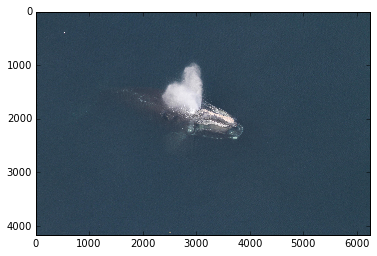

In [2]:
# visualize data
i = random.randrange(0, data_size)
img = imread(os.path.join(data_root, 'imgs', 'w_' + str(i) + '.jpg'))
pylab.imshow(img)
pylab.show()

In [3]:
# load train
train = pd.read_csv(os.path.join(data_root, 'train.csv'))

In [4]:
train.head()

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


In [5]:
heads = pd.read_csv(os.path.join(data_root, 'train_with_annotations_vinh.csv'))

In [6]:
heads.head()

,Image,whaleID,x,y,width,height
0,w_7812.jpg,whale_48813,1411.343576,985.277591,505.953358,505.953358
1,w_4598.jpg,whale_09913,1192.119312,1018.464137,628.913338,478.725078
2,w_3828.jpg,whale_45062,1060.704585,826.035429,600.753039,459.951546
3,w_8734.jpg,whale_74162,1496.707861,984.427725,337.585527,356.471430
4,w_3251.jpg,whale_99558,1406.999818,644.481460,439.097259,538.248253


/home/cuda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


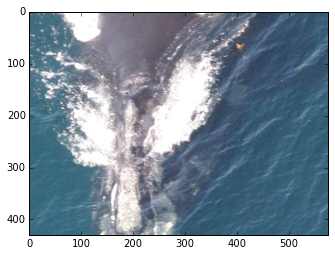

In [7]:
# visualize crop
i = random.randrange(0, heads.shape[0])
img = imread(os.path.join(data_root, 'imgs', heads.Image[i]))
crop_img = img[heads.y[i]:(heads.y[i] + heads.width[i]), heads.x[i]:(heads.x[i] + heads.height[i])]
pylab.imshow(crop_img)
pylab.show()

In [8]:
# create data
train_img_data = []
for image in heads.Image:
    img = imread(os.path.join(data_root, 'imgs', image), flatten = True)
    img = imresize(img, (128, 128))
    train_img_data.append(img)
train_img_data = np.stack(train_img_data)

IOError: [Errno 2] No such file or directory: '/home/cuda/workspace/right_whale/data/imgs/w_7489.jpg'

In [ ]:
with open(os.path.join(data_root, 'train_image_data.npy') as f:
    np.save(f, img_data)
    f.close()

In [ ]:
# setting nn 
net = NeuralNet(
    layers = [
        ('input', layers.InputLayer),
        ('hidden4', layers.DenseLayer),
        ('output', layers.DenseLayer),
    ],

    input_shape = (None, 3, 128, 128),
    hidden4_num_units = 128,
    output_num_units = 4, output_nonlinearity = None,

    batch_iterator_train = BatchIterator(batch_size = 10),
    batch_iterator_test = BatchIterator(batch_size = 10),

    update=updates.adam,

    regression = True,
    max_epochs = 50,
    verbose = 1,
)